In [11]:
import pandas as pd

In [15]:
# specify the column names in the comments in the header
df = pd.read_csv('log-2024-06-18_15-51-28.csv', skiprows=1, names=['timestamp', 't', 'action', 'reward', 'new_Q_value', 'alpha', 'epsilon'])

df

,timestamp,t,action,reward,new_Q_value,alpha,epsilon
0,2024-06-18 15:51:28,2,4,-3,-7.297475,0.480546,0.961092
1,2024-06-18 15:51:28,3,1,0,-5.860352,0.465495,0.930989
2,2024-06-18 15:51:28,4,6,-5,-8.046259,0.448020,0.896041
3,2024-06-18 15:51:28,5,4,-3,-7.841694,0.428567,0.857133
4,2024-06-18 15:51:28,6,4,-3,-8.137348,0.407439,0.814878
...,...,...,...,...,...,...,...
115,2024-06-18 15:51:28,117,1,0,-5.577251,0.007291,0.014583
116,2024-06-18 15:51:28,118,1,0,-5.575218,0.007291,0.014583
117,2024-06-18 15:51:28,119,1,0,-5.573185,0.007291,0.014583
118,2024-06-18 15:51:28,120,1,0,-5.571153,0.007291,0.014583


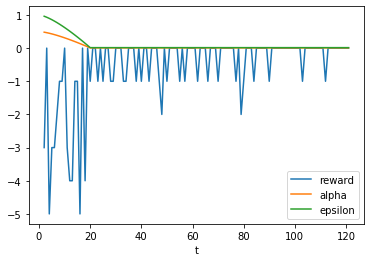

In [16]:
df_plot = df

df_plot.plot('t', ['reward', 'alpha', 'epsilon'])


In [17]:
df_plot = df.pivot(index='t', columns='action', values='new_Q_value')
df_plot = df_plot.fillna(method='ffill')
df_plot = df_plot.fillna(-6.0)
df_plot

action,0,1,2,3,4,5,6
t,,,,,,,
2,-6.000000,-6.000000,-6.000000,-6.000000,-7.297475,-6.000000,-6.000000
3,-6.000000,-5.860352,-6.000000,-6.000000,-7.297475,-6.000000,-6.000000
4,-6.000000,-5.860352,-6.000000,-6.000000,-7.297475,-6.000000,-8.046259
5,-6.000000,-5.860352,-6.000000,-6.000000,-7.841694,-6.000000,-8.046259
6,-6.000000,-5.860352,-6.000000,-6.000000,-8.137348,-6.000000,-8.046259
...,...,...,...,...,...,...,...
117,-6.331227,-5.577251,-6.180836,-7.122081,-8.234613,-7.619488,-8.377934
118,-6.331227,-5.575218,-6.180836,-7.122081,-8.234613,-7.619488,-8.377934
119,-6.331227,-5.573185,-6.180836,-7.122081,-8.234613,-7.619488,-8.377934


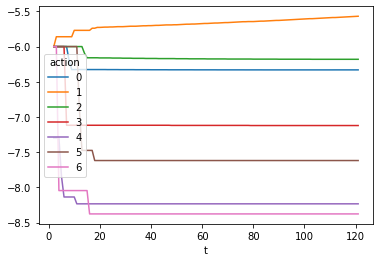

In [18]:
df_plot.plot()